<!DOCTYPE html>
<html>
  <body>
    <div align=center>
      <h1><b>Organización de Datos</b></h1>
      <p>Cátedra Rodriguez - 95.58</p>
      <img src="https://upload.wikimedia.org/wikipedia/commons/thumb/0/0d/FIUBA_gris_transparente.png/800px-FIUBA_gris_transparente.png" alt="logo" width="300">
      <h2><b>Trabajo Práctico N°1: Reservas de Hotel</b></h2>
    </div>
    <h3>Integrantes del <b>Grupo 17 (Systeam)</b></h3>
    <ul>
        <li>Agha Zadeh Dehdeh, Lucía. P: 106905</li>
        <li>Brizuela, Sebastián. P: 105288</li>
        <li>Del Rio, Juan Sebastián. P: 103337</li>
    </ul>
  </body>
</html>

# Librerías

In [103]:
import pandas as pd
import numpy as np

#Visualización
import matplotlib.pyplot as plt
import seaborn as sns

#Modelos y métricas
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, StratifiedKFold, RandomizedSearchCV
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report

#Reglas
from sklearn.tree import export_text

#Configuración warnings
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)
warnings.simplefilter(action="ignore", category=UserWarning)

# Dataframe Principal

### Carga del dataframe

In [26]:
DF_HOTEL_TRAIN = pd.read_csv("./sample_data/hotel_train_procesado.csv") # Cargamos en memoria el dataset

In [27]:
df_hotel_copy = DF_HOTEL_TRAIN.copy()

###Preprocesamiento

Se determinó como nuevas variables relevantes “market_segment“, “distribution_channel“, “customer_type“, “required_car_parking_spaces“ al analizar nuevamente los gráficos, realizar pruebas con los modelos implementados y ver una mejoría en las métricas.

In [28]:
columnas_a_eliminar = [
    "children", "arrival_date_year", "arrival_date_month",
    "arrival_date_week_number", "arrival_date_day_of_month",
    "stays_in_weekend_nights", "stays_in_week_nights", "babies",
    "meal", "adr", "id", "cantidad_personas_total"
]

df_hotel_copy.drop(columnas_a_eliminar, axis="columns", inplace=True)


In [29]:
columnas_categoricas = ["hotel", "country", "reserved_room_type", "assigned_room_type", "deposit_type","agent", 'market_segment', 'distribution_channel', 'customer_type']

#One Hot encoding
df_hotel_copy = pd.get_dummies(df_hotel_copy, columns=columnas_categoricas, drop_first=True)


In [30]:
df_hotel_copy.sort_index(axis="columns", inplace=True) # Reordeno para que coincida el orden con df_hotel_test

# Árboles de decisión

## Target

In [31]:
target = "is_canceled"

#Se muestra el porcentaje de aparición de cada clase
df_hotel_copy[target].value_counts(normalize=True) * 100

1    50.221485
0    49.778515
Name: is_canceled, dtype: float64

## División de datos entrenamiento y prueba

In [32]:
df_hotel_copy_x = df_hotel_copy.drop([target], axis="columns" ,inplace=False)

df_hotel_copy_y = df_hotel_copy[target].copy()

x_train, x_test, y_train, y_test = train_test_split(df_hotel_copy_x, df_hotel_copy_y, test_size = 0.2, random_state = 17, stratify = df_hotel_copy[target].values)

print(f"# Datos Entrenamiento: {len(x_train)}")
print(f"# Datos Prueba: {len(x_test)}")

# Datos Entrenamiento: 48220
# Datos Prueba: 12055


## Opciones

Se optó por iniciar la construcción de árboles de decisión utilizando hiperparámetros arbitrarios como primera elección. Posteriormente, para mejorar su rendimiento y precisión, se implementó la técnica de validación cruzada k-fold con RandomizedSearchCV. Además, se incorporó la técnica de poda en el proceso.

### Primera opción (DecisionTreeClassifier y Hiperparámetros arbitrarios)

#### Modelo

In [ ]:
#Creación del clasificador con hiperparámetros arbitrarios
tree_model = DecisionTreeClassifier(criterion = "entropy",
                                         max_depth = 20,
                                         min_samples_leaf = 10)

In [ ]:
#Entrenamiento del model
model = tree_model.fit(X = x_train, y = y_train)

#### Predicción

In [ ]:
y_pred = model.predict(x_test)

#### Metricas

In [ ]:
#Calculo las métricas en el conjunto de evaluación
print("Accuracy: ", accuracy_score(y_test, y_pred))
print("Recall: ", recall_score(y_test, y_pred))
print("Precision: ", f1_score(y_test, y_pred))
print("f1 score: ", precision_score(y_test, y_pred))

Accuracy:  0.8147984294641376
Recall:  0.8195052539404554
Precision:  0.8172242536702505
f1 score:  0.8149559159682159


#### Matriz de confusión

In [ ]:
cm = confusion_matrix(y_test, y_pred)

Text(50.722222222222214, 0.5, 'True')

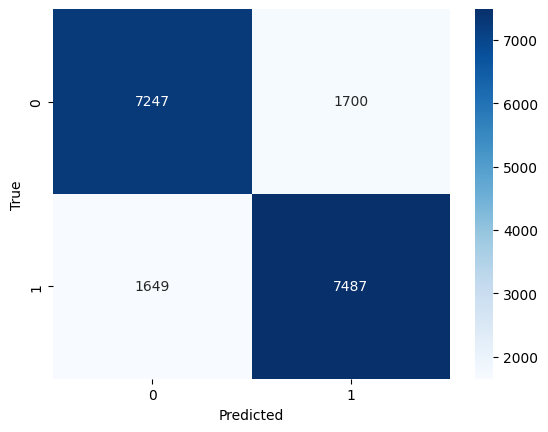

In [ ]:
sns.heatmap(
    data = cm,
    cmap = "Blues",
    annot = True,
    fmt = "g"
)

plt.xlabel("Predicted")
plt.ylabel("True")

### Segunda opción (DecisionTreeClassifier y Hiperparámetros arbitrarios con poda)

#### Modelo

In [59]:
#Creación del clasificador con hiperparámetros arbitrarios
tree_model_poda = DecisionTreeClassifier(criterion = "entropy",
                                    max_depth = 20,
                                    min_samples_leaf = 10,
                                    ccp_alpha=0.01)

In [60]:
#Entrenamiento del model
model_poda = tree_model_poda.fit(X = x_train, y = y_train)

#### Predicción

In [61]:
y_pred_poda = model_poda.predict(x_test)

#### Metricas

In [62]:
#Calculo las métricas en el conjunto de evaluación
print("Accuracy: ", accuracy_score(y_test, y_pred_poda))
print("Recall: ", recall_score(y_test, y_pred_poda))
print("Precision: ", f1_score(y_test, y_pred_poda))
print("f1 score: ", precision_score(y_test, y_pred_poda))

Accuracy:  0.7901285773537952
Recall:  0.7978196233894945
Precision:  0.7924528301886792
f1 score:  0.7871577574967406


#### Matriz de confusión

In [63]:
cm = confusion_matrix(y_test, y_pred_poda)

Text(50.722222222222214, 0.5, 'True')

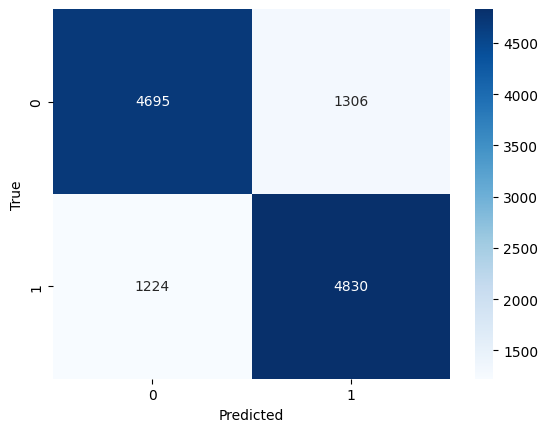

In [64]:
sns.heatmap(
    data = cm,
    cmap = "Blues",
    annot = True,
    fmt = "g"
)

plt.xlabel("Predicted")
plt.ylabel("True")

### Tercera opción (DecisionTreeClassifier y RandomSearchCV)

En este proceso de búsqueda, se emplearon 8 folds para evaluar diferentes combinaciones de hiperparámetros de manera eficiente.
La métrica adecuada que se consideró fue f1-score ya que además de ser relevante para la competencia en Kaggle también combina dos medidas importantes a saber, la  precisión y recall.

Esta fue la opción que obtuvo la mejor perfonmance.

#### Busqueda de los mejores hiperparámetros

In [65]:
#Cantidad de combinaciones que quiero porbar
n = 10

#Conjunto de parámetros que quiero usar
params_grid = {
    "criterion": ["gini", "entropy"],
    "min_samples_leaf": range(5, 8),
    "min_samples_split":  range(20, 23),
    "ccp_alpha": np.linspace(0, 0.0001, n),
    "max_depth": range(25, 30)
}

In [66]:
#KFold Estratificado

#Cantidad de splits para el Cross Validation
folds = 8

kfoldcv = StratifiedKFold(n_splits=folds)

In [67]:
#Clasificador
base_tree = DecisionTreeClassifier()

In [68]:
#Random Search Cross Validation
randomcv = RandomizedSearchCV(estimator = base_tree,
                              param_distributions = params_grid,
                              scoring = "f1",
                              cv = kfoldcv,
                              n_iter = n)

In [69]:
#Busco los hiperparamtros que optimizan F1 Score
randomcv.fit(x_train, y_train)

RandomizedSearchCV(cv=StratifiedKFold(n_splits=8, random_state=None, shuffle=False),
                   estimator=DecisionTreeClassifier(),
                   param_distributions={'ccp_alpha': array([0.00000000e+00, 1.11111111e-05, 2.22222222e-05, 3.33333333e-05,
       4.44444444e-05, 5.55555556e-05, 6.66666667e-05, 7.77777778e-05,
       8.88888889e-05, 1.00000000e-04]),
                                        'criterion': ['gini', 'entropy'],
                                        'max_depth': range(25, 30),
                                        'min_samples_leaf': range(5, 8),
                                        'min_samples_split': range(20, 23)},
                   scoring='f1')

In [70]:
#Mejores hiperparametros del arbol
print(randomcv.best_params_)

#Mejor métrica
print(randomcv.best_score_)

{'min_samples_split': 22, 'min_samples_leaf': 5, 'max_depth': 27, 'criterion': 'gini', 'ccp_alpha': 5.555555555555556e-05}
0.8446684101636628


#### Árbol con mejores parámetros

In [72]:
#Creo el árbol con los mejores hiperparámetros
arbol_kfold = DecisionTreeClassifier().set_params(**randomcv.best_params_)

In [73]:
#Entreno el arbol en todo el set
arbol_kfold.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=5.555555555555556e-05, max_depth=27,
                       min_samples_leaf=5, min_samples_split=22)

#### Predicción

In [74]:
y_pred_kfold = arbol_kfold.predict(x_test)

#### Métricas

In [75]:
#Calculo las métricas en el conjunto de evaluación
print("Accuracy: ", accuracy_score(y_test, y_pred_kfold))
print("Recall: ", recall_score(y_test, y_pred_kfold))
print("Precision: ", f1_score(y_test, y_pred_kfold))
print("f1 score: ", precision_score(y_test, y_pred_kfold))

Accuracy:  0.845707175445873
Recall:  0.8386190948133465
Precision:  0.8451806226069585
f1 score:  0.8518456375838926


#### Matriz de confusión

In [95]:
#Matriz de Confusion
cm = confusion_matrix(y_test, y_pred_kfold)

Text(50.722222222222214, 0.5, 'True')

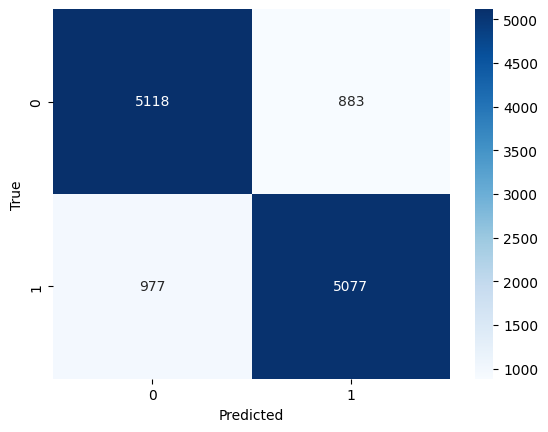

In [96]:
sns.heatmap(
    data = cm,
    cmap = "Blues",
    annot = True,
    fmt = "g"
)

plt.xlabel("Predicted")
plt.ylabel("True")

# Gráfico del árbol de decisión con mejor performance

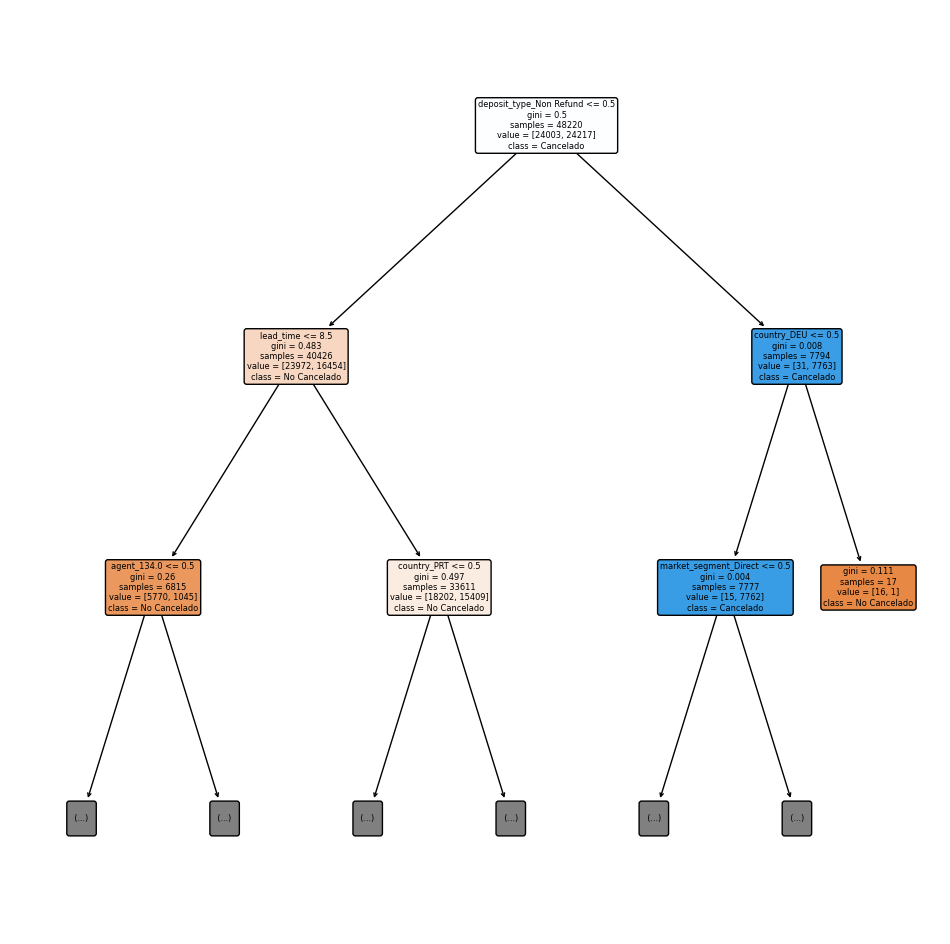

In [97]:
plt.figure(figsize = (12, 12))

tree_plot = plot_tree(
    decision_tree = arbol_kfold,
    max_depth = 2,
    feature_names = df_hotel_copy_x.columns.to_list(),
    filled = True,
    rounded = True,
    class_names = ["No Cancelado", "Cancelado"]
)

plt.show(tree_plot)

## Reglas

In [105]:
reglas = export_text(arbol_kfold, feature_names=list(df_hotel_copy_x), max_depth=2)
print(reglas)

|--- deposit_type_Non Refund <= 0.50
|   |--- lead_time <= 8.50
|   |   |--- agent_134.0 <= 0.50
|   |   |   |--- truncated branch of depth 16
|   |   |--- agent_134.0 >  0.50
|   |   |   |--- class: 1
|   |--- lead_time >  8.50
|   |   |--- country_PRT <= 0.50
|   |   |   |--- truncated branch of depth 25
|   |   |--- country_PRT >  0.50
|   |   |   |--- truncated branch of depth 25
|--- deposit_type_Non Refund >  0.50
|   |--- country_DEU <= 0.50
|   |   |--- market_segment_Direct <= 0.50
|   |   |   |--- truncated branch of depth 3
|   |   |--- market_segment_Direct >  0.50
|   |   |   |--- class: 1
|   |--- country_DEU >  0.50
|   |   |--- class: 0



Como regla principal clasifica si el tipo de depósito es NO reembolsable, en caso de serlo como segunda regla filtra según el país de origen en este caso Alemania. En caso de no serlo filtraría según el tiempo de espera.

# Predicción con DF_HOTEL_TEST

### Carga del DataFrame TEST

In [79]:
DF_HOTEL_TEST = pd.read_csv(("./sample_data/hotels_test.csv"))

In [80]:
df_hotel_test_copy = DF_HOTEL_TEST.copy()

## Preprocesamiento

### Tratamiento de datos faltantes

In [81]:
df_hotel_test_copy['agent'] = df_hotel_test_copy['agent'].fillna("Agencia no existe")

df_hotel_test_copy['country'] = df_hotel_test_copy['country'].fillna(df_hotel_test_copy['country'].mode()[0])

### Eliminación de variables irrelavantes y/o con datos faltantes

In [82]:
columnas_a_eliminar = [
    "children", "arrival_date_year", "arrival_date_month",
    "arrival_date_week_number", "arrival_date_day_of_month",
    "stays_in_weekend_nights", "stays_in_week_nights", "babies",
    "meal", "adr", "id", "company"
]
df_hotel_test_copy.drop(columnas_a_eliminar, axis="columns", inplace=True)

### Transformación de las variables categoricas

In [83]:
#One Hot encoding
df_hotel_test_copy = pd.get_dummies(df_hotel_test_copy, columns=columnas_categoricas, drop_first=True)

## Emparejamiento de los dataframes

In [84]:
columnas_df_train = set(df_hotel_copy.columns) # Obtiene las columnas del primer DataFrame
columnas_df_test = set(df_hotel_test_copy.columns) # Obtiene las columnas del segundo DataFrame

In [85]:
columnas_distintas = columnas_df_test.difference(columnas_df_train) # Encuentra las columnas que son distintas entre los DataFrames
print(columnas_distintas)

{'agent_444.0', 'agent_165.0', 'agent_135.0', 'agent_232.0', 'country_UZB', 'agent_337.0', 'reserved_room_type_P', 'country_MLI', 'agent_367.0', 'agent_282.0', 'country_DMA', 'reservation_status_date', 'country_BFA', 'country_SMR', 'agent_363.0', 'agent_397.0', 'country_NIC', 'agent_150.0', 'country_ATF', 'country_KHM', 'assigned_room_type_P', 'country_TMP', 'country_SLV', 'agent_358.0', 'agent_213.0', 'agent_122.0', 'agent_510.0', 'agent_469.0', 'country_DJI', 'agent_331.0', 'agent_211.0', 'country_ASM'}


In [86]:
df_hotel_test_copy.drop(columnas_distintas, axis="columns", inplace=True) ##DESPUES CAMBIAR SOLUCIÓN

In [87]:
columnas_distintas = columnas_df_train.difference(columnas_df_test) # Encuentra las columnas que son distintas entre los DataFrames
print(columnas_distintas)

{'agent_278.0', 'agent_431.0', 'country_SYC', 'market_segment_Undefined', 'agent_461.0', 'agent_247.0', 'agent_483.0', 'agent_441.0', 'agent_404.0', 'country_COM', 'agent_107.0', 'agent_451.0', 'agent_299.0', 'agent_497.0', 'agent_391.0', 'agent_430.0', 'country_VGB', 'agent_289.0', 'agent_24.0', 'country_TGO', 'is_canceled', 'country_NAM', 'country_AZE', 'agent_244.0', 'country_KNA', 'agent_167.0', 'agent_144.0', 'country_PYF', 'agent_197.0', 'agent_214.0', 'agent_449.0', 'agent_414.0', 'country_SYR', 'country_MDG', 'country_MNE', 'agent_432.0', 'country_HND', 'agent_333.0', 'agent_455.0', 'agent_416.0', 'agent_352.0', 'country_BEN', 'country_PAN', 'country_ARM', 'agent_291.0', 'agent_265.0', 'agent_535.0', 'agent_304.0', 'country_MUS', 'country_GTM', 'agent_283.0', 'agent_509.0', 'country_MYT', 'country_ETH', 'agent_388.0', 'distribution_channel_Undefined', 'assigned_room_type_L', 'agent_418.0', 'agent_321.0', 'country_SDN', 'country_UMI', 'agent_59.0', 'agent_472.0', 'country_CIV', 

In [88]:
for columna in columnas_distintas:
  df_hotel_test_copy[columna] = 0

In [89]:
df_hotel_test_copy.drop(["is_canceled"], axis="columns", inplace=True)

### Reordenamiento

In [90]:
df_hotel_test_copy.sort_index(axis="columns", inplace=True)

## Predicción del conjunto de test y submits para la competencia Kaggle

In [91]:
test_pred = arbol_kfold.predict(df_hotel_test_copy)
print(test_pred)

[1 1 0 ... 1 1 0]


### Resultado

In [92]:
df_resultado = pd.DataFrame(
    {"id": DF_HOTEL_TEST["id"],
    "is_canceled": test_pred}
)

In [93]:
df_resultado.head()

,id,is_canceled
0,e6d0d58a-ab96-44d3-b28f-85df1cc15f1e,1
1,aba9aac2-4495-4645-a60e-90328713c999,1
2,b345b5dc-c804-4d77-a39f-1f4e65d1f1ad,0
3,ce1b400e-afa1-4946-bdff-004b859eb61c,1
4,c4fbec0d-8e2e-4db2-9d4f-a6ccb9f51214,1


### Exportación

In [94]:
df_resultado.to_csv("resultado.csv", index=False)

# Guardado del modelo

In [ ]:
# Guardado del modelo

import joblib

joblib.dump(arbol_kfold, "modelo_arbol.joblib")